In [2]:
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import nearest_points
import geopandas as gpd
import json

In [3]:
with open('test-snipped-berlin.json') as f:
    data = json.load(f)
#print(data)

In [6]:
df_lines = gpd.read_file("lines-bus.geojson")

In [7]:
df_lines

,geometry
0,"LINESTRING (13.33550 52.56521, 13.33560 52.56514)"
1,"LINESTRING (13.33550 52.56521, 13.33565 52.56529)"
2,"LINESTRING (13.33550 52.56521, 13.33533 52.56512)"
3,"LINESTRING (13.33641 52.56473, 13.33688 52.56462)"
4,"LINESTRING (13.33641 52.56473, 13.33634 52.56475)"
...,...
345209,"LINESTRING (13.57421 52.52725, 13.57404 52.52733)"
345210,"LINESTRING (13.10746 52.39883, 13.10694 52.39798)"
345211,"LINESTRING (13.10746 52.39883, 13.10759 52.39914)"
345212,"LINESTRING (13.11031 52.39626, 13.11137 52.39627)"


In [34]:
point = Point(13.33550, 52.56521)
#print(point_1)

In [47]:
# create your circle buffer from one of the points
# distance 1 = 1 kilometer
#distance = 0.00001

# 10 Meter
#distance = 0.0001
# 100 Meter
#distance = 0.001

# 1000 Meter
#distance = 0.01
distance = 0.02

# 10000 Meter
#distance = 0.1

# 100000 Meter
#distance = 1.0

circle_buffer = point.buffer(distance)



In [48]:
line = df_lines.geometry[0]

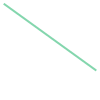

In [49]:
line

In [50]:
line.within(point)  # False

False

In [51]:
line.distance(point)  # 7.765244949417793e-11

4.743416492881661e-06

In [52]:
line.distance(point) < 0.02  # True

True

In [53]:
%%time
count = 0
for geom in df_lines.geometry:
    #print(geom)
    if geom.within(circle_buffer):
        count = count + 1
        #print('point 2 is within the distance buffer of point 1')
        pass
print(count)

3813
Wall time: 1.09 s


In [54]:
%%time
count = 0
for geom in df_lines.geometry:
    if circle_buffer.contains(geom):
        count = count + 1
        #print('circle buffer contains point 2')
        pass
print(count)

3813
Wall time: 1.13 s


In [55]:
%%time
count = 0
for geom in df_lines.geometry:
    if point.distance(geom) < distance:
        count = count + 1
        #print(geom)
        #print(point.distance(geom))
        #print('point 1 is within the distance of point 2')
        pass
print(count)

3898
Wall time: 1.31 s


In [46]:
df_stations

,geometry
0,"LINESTRING (13.33550 52.56521, 13.33560 52.56514)"
1,"LINESTRING (13.33550 52.56521, 13.33565 52.56529)"
2,"LINESTRING (13.33550 52.56521, 13.33533 52.56512)"
3,"LINESTRING (13.33641 52.56473, 13.33688 52.56462)"
4,"LINESTRING (13.33641 52.56473, 13.33634 52.56475)"
...,...
345209,"LINESTRING (13.57421 52.52725, 13.57404 52.52733)"
345210,"LINESTRING (13.10746 52.39883, 13.10694 52.39798)"
345211,"LINESTRING (13.10746 52.39883, 13.10759 52.39914)"
345212,"LINESTRING (13.11031 52.39626, 13.11137 52.39627)"
